In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk.corpus


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('./mail_data.csv')

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
100 * df.isna().mean()

Category    0.0
Message     0.0
dtype: float64

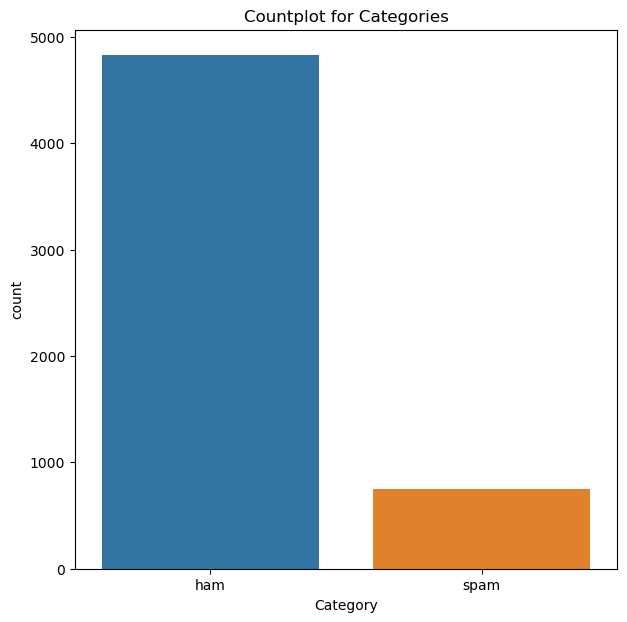

In [6]:
plt.figure(figsize=(7, 7))
sns.countplot(x='Category', data=df)
plt.title('Countplot for Categories')
plt.show()

In [7]:
df['Category'].replace(['ham', 'spam'], [0, 1], inplace=True)

In [8]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Data Cleaning

In [9]:
def text_preprocessing(texts):
    processed = []
    
    for text in texts:
        text = text.lower()
        #Remove any pattern from the text of the message
        text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", '', text)

        stop = stopwords.words('english')

        stemmer = PorterStemmer()

        text = " ".join([word for word in text.split() if word not in (stop)])

        text = stemmer.stem(text)
        # text = lemmatizer.lemmatize(text)
    
        processed.append(text)
    
    return processed

In [10]:
text_preprocessing(df['Message'])[0], df['Message'][0]

('go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

## Training

In [11]:
X = df['Message']
Y = df['Category']


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=44)

In [13]:
X_test[0:10], Y_test[0:10]

(5243    Of course ! Don't tease me ... You know I simp...
 2572    … and don‘t worry we‘ll have finished by march...
 4466    CHEERS FOR CALLIN BABE.SOZI CULDNT TALKBUT I W...
 4009    Forgot you were working today! Wanna chat, but...
 2021    Anything lor but toa payoh got place 2 walk me...
 3438                        Then what about further plan?
 2028    No got new job at bar in airport on satsgettin...
 437     Ask g or iouri, I've told the story like ten t...
 1594    PRIVATE! Your 2003 Account Statement for shows...
 885     Yoyyooo u know how to change permissions for a...
 Name: Message, dtype: object,
 5243    0
 2572    0
 4466    0
 4009    0
 2021    0
 3438    0
 2028    0
 437     0
 1594    1
 885     0
 Name: Category, dtype: int64)

In [14]:
feature_extraction = TfidfVectorizer()

X_train = feature_extraction.fit_transform(text_preprocessing(X_train))
X_test = feature_extraction.transform(text_preprocessing(X_test))

In [15]:
# Find best model
classifiers = [
    SVC(),
    #handle complex decision boundaries,
    DecisionTreeClassifier(),
    #handle both numerical and categorical data,
    RandomForestClassifier(),
    #combines multiple decision trees to improve the accuracy and reduce overfitting,
    LogisticRegression()
    # linear classifier that works well for binary classification tasks,
]

In [16]:
acc_dict = {}
log_cols = ['Classifier', 'Accuracy']
log = pd.DataFrame(columns=log_cols)

In [17]:
# Loop to do fit and predictions of each classifier into the dataset
for clf in classifiers:
    name = clf.__class__.__name__
    
    clf.fit(X_train, Y_train)
    
    Y_predict = clf.predict(X_test)
    acc = accuracy_score(Y_test, Y_predict)
    
    acc_dict[name] = acc

In [18]:
# Storing the results in a DataFrame to be visualized
for clf in acc_dict:
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

C:\Users\user\AppData\Local\Temp\ipykernel_24360\3907952991.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\user\AppData\Local\Temp\ipykernel_24360\3907952991.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\user\AppData\Local\Temp\ipykernel_24360\3907952991.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\user\AppData\Local\Temp\ipykernel_24360\3907952991.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

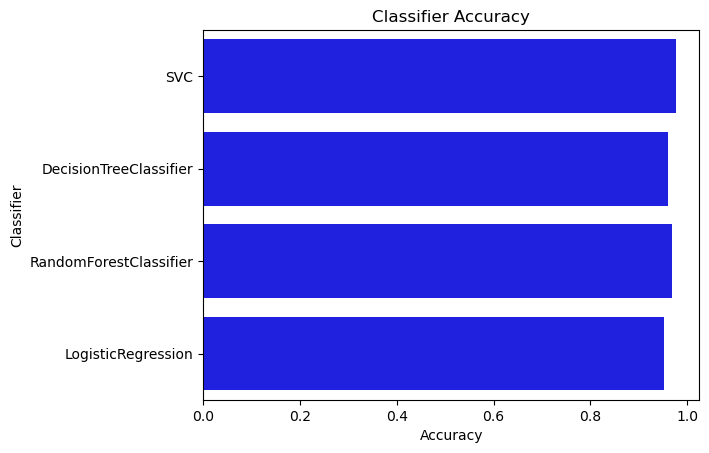

In [19]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.barplot(x='Accuracy', y='Classifier', data=log, color='b')

In [20]:
log

,Classifier,Accuracy
0,SVC,0.975785
0,DecisionTreeClassifier,0.960538
0,RandomForestClassifier,0.968610
0,LogisticRegression,0.951570


## Inference

In [21]:
# SVC was the best classifier
model = SVC(probability=True) # to use predict_proba method

model.fit(X_train, Y_train)

SVC(probability=True)

In [22]:
def inference(text, model, feature_extraction):
    text = text_preprocessing([text])
    text = feature_extraction.transform(text)
    
    values = model.predict(text)
    probabilities = model.predict_proba(text)
    
    return values, probabilities

In [23]:
values, probabilities = inference('test mail', model, feature_extraction)

In [24]:
# print result
print('SPAM' if values[0] == 1 else 'HAM')

HAM


In [25]:
probabilities

array([[0.998503, 0.001497]])